## Team 7: Online News Popularity

In [1]:
# load the data as dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

csv_path = './datasets/OnlineNewsPopularity.csv'
df = pd.read_csv(csv_path)

<font color='blue'>

# 1) EDA

In [2]:
# clean column names
df.columns = df.columns.map(lambda x: x.replace(' ', '')) # remove weird spaces

In [3]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                1.0                 0.0   
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is

In [4]:
#Remove non-predictive columns "URL" and "timedelta"

df.drop(columns=['url', 'timedelta'], inplace=True)

In [5]:
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  num_keywords  \
count  39644.000000          39644.000000  39644.000000   
mean       1.249874              4.548239      7.223767   
std        4.107855              0.844406      1.909130   
min        0.000000              0.000000      1.000000   
25%        0.000000              4.478404      6.000000   
50%        0.000000              4.664082      7.000000   
75%        1.000000              4.854839      9.000000   
max       91.000000              8.041534     10.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               39644.000000                   39644.000000   
mean                    0.052946                       0.178009   
std                     0.223929                       0.382525   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  298400.000000  42827.857143   

          kw_min_max     kw_max_max     kw_avg_max    kw_min_avg  \
count   39644.000000   3964

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null flo

<font color='blue'>

## 1.1) Target Stats & Plots 

In [7]:
target = df['shares']

In [8]:
target.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

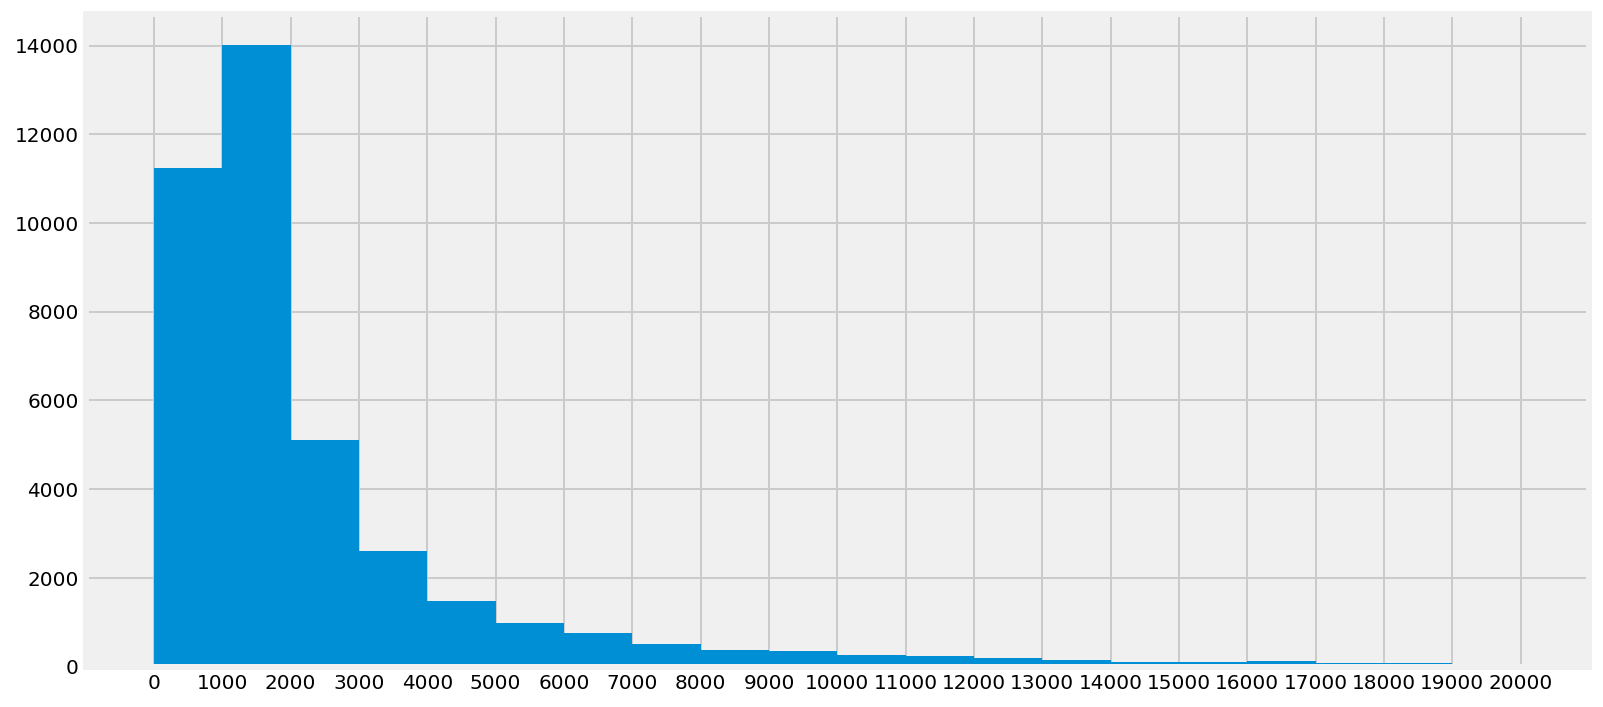

In [9]:
#Plot histogram distribution of shares limit to 20,000

fig, ax = plt.subplots(figsize=(12,6))

ax.hist(x=target, bins=np.arange(0, 21000, 1000))
ax.set_xticks(np.arange(0, 21000, 1000))

plt.show()

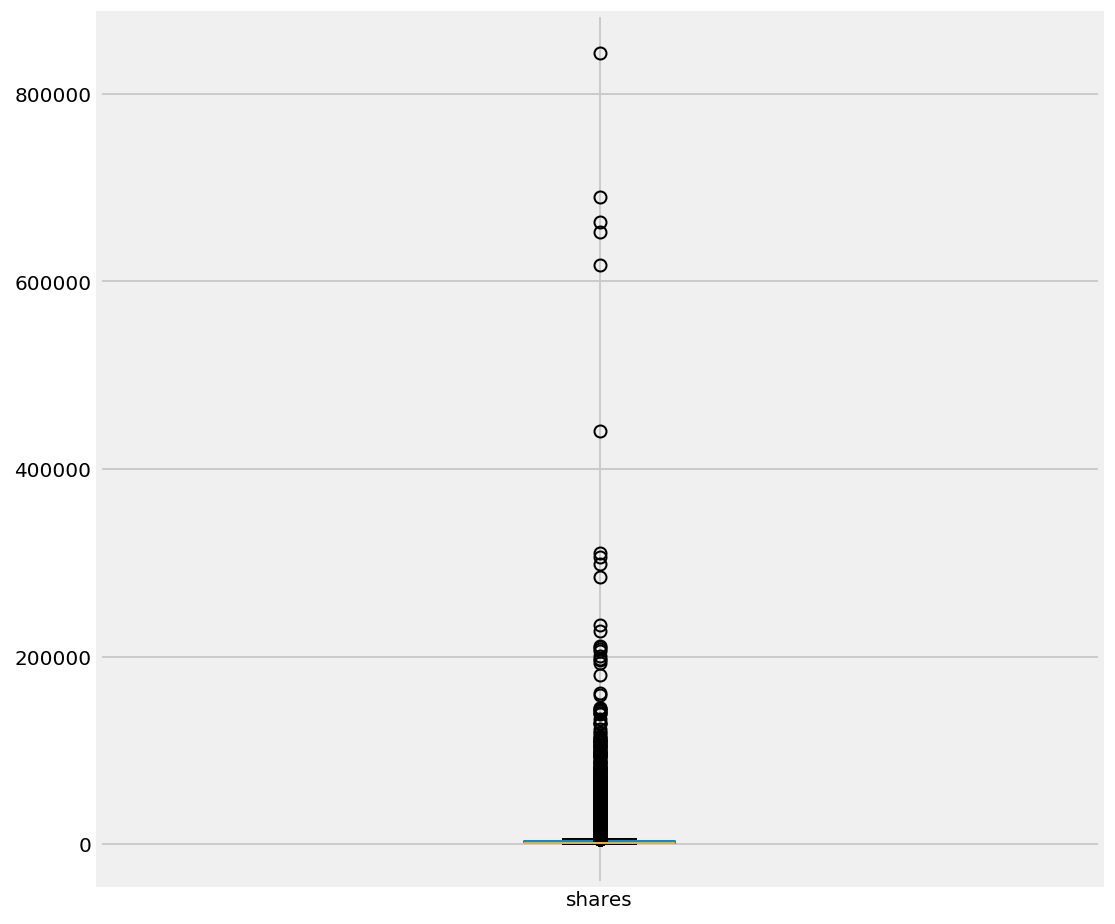

In [10]:
#Plot boxplot of target distribution

fig, ax = plt.subplots(figsize=(8,8))

ax = df['shares'].plot(kind='box', ax=ax)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


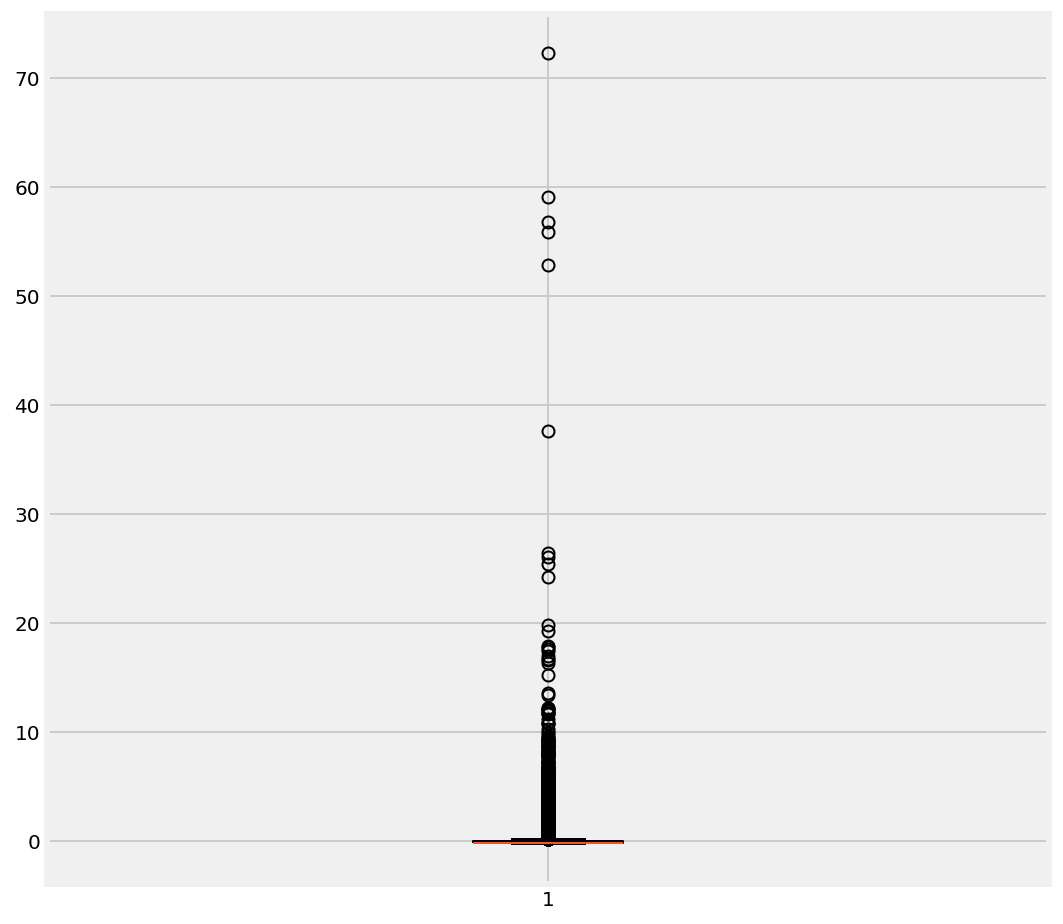

In [11]:
#Plot normalized boxplot of shares

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scores_norm = scaler.fit_transform(target.values.reshape([-1,1]))

fig, ax = plt.subplots(figsize=(8,8))

ax.boxplot(x=scores_norm)

plt.show()

<font color='blue'>

## 1.2) Corelation to Target

In [12]:
#Top 5 most correlated varirables to target

top_correlated = df.corr()['shares'].abs().sort_values()[::-1][1:6]
top_correlated

kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
Name: shares, dtype: float64

In [13]:
top_correlated_columns = list(top_correlated.keys())
top_correlated_columns

['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess']

In [14]:
sns.pairplot(df[top_correlated_columns + ['shares']], height=10);

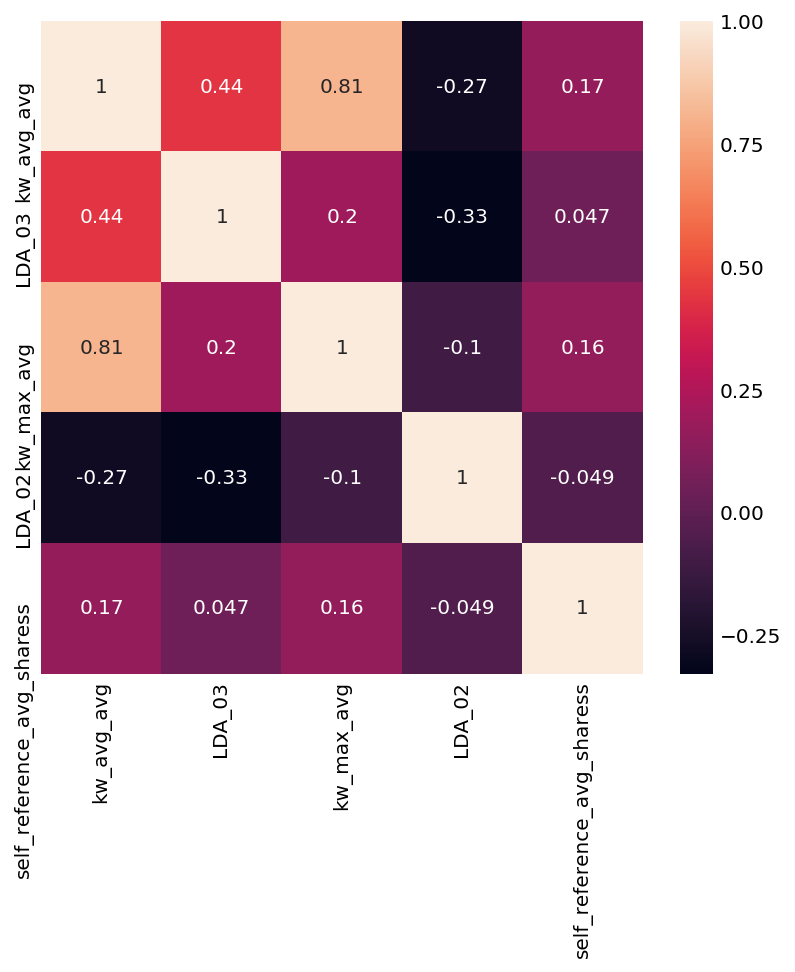

In [15]:
#Check for multicorrelation between top variables

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(data=df[top_correlated_columns].corr(), annot=True, ax=ax)

plt.show()

<font color='blue'>

## 2) Build Linear Regression Model with 5 Variables

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm


<font color='blue'>
    
### 2.1) Create predictor and target variables. Standardize the predictors.

In [17]:
y = target
X = df.iloc[:,:58]

# Initialize the StandardScaler object.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Use the "fit_transform" function to standardize the X design matrix.
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=df.columns[:58])

<font color='blue'>
    
### 2.2) Perform 80/20 -Train/ Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Xs, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=8)

<font color='blue'>
    
### 2.3) Perform Cross Validation (cv=10) with Different Models for the top 5 correlated variables

<font color='blue'>
    
#### 2.3.1) Linear Regression

In [19]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train[top_correlated_columns], y_train, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[0.03477823 0.03144742 0.02445436 0.02148632 0.01440098 0.02303927
 0.01137111 0.02532045 0.0046344  0.03503311]
0.022596565219746047


In [20]:
linreg.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(linreg.score(X_test[top_correlated_columns], y_test)))

R2 Score: 0.010138581247428946


<font color='blue'>
    
#### 2.3.2) Ridge Regression

In [21]:
#Find optimal value for ridge regression alpha using RidgeCV

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, store_cv_values=False)
optimal_ridge.fit(X_train[top_correlated_columns], y_train)

print(optimal_ridge.alpha_, optimal_ridge.score(X_train[top_correlated_columns], y_train))

910.2981779915227 0.019043850630284687


In [22]:
#Cross-validate the ridge regression R2 with the optimal alpha

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train[top_correlated_columns], y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.03436955 0.03197013 0.02413499 0.02144995 0.01547699 0.02244622
 0.01122799 0.02645472 0.00471659 0.03484468]
0.022709181700040448


In [23]:
#Look at the Ridge Coefficients

ridge.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(ridge.score(X_test[top_correlated_columns], y_test)))
print("Ridge Coefficients:")
print(top_correlated_columns)
print(ridge.coef_)

R2 Score: 0.00991047869405115
Ridge Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess']
[1338.71956012  335.37131779 -375.8096747  -214.84478143  502.90382263]


<font color='blue'>
    
#### 2.3.3) Lasso Regression

In [24]:
#Find optimal value for lasso regression alpha using LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train[top_correlated_columns], y_train)

print(optimal_lasso.alpha_, optimal_lasso.score(X_train[top_correlated_columns], y_train))

1.3171020843450747 0.01910923743880366


In [25]:
#Cross-validate the Lasso regression R2 with the optimal alpha

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train[top_correlated_columns], y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.03476459 0.03150718 0.02444824 0.02148993 0.01445708 0.02298775
 0.01136094 0.02539686 0.00463856 0.03503299]
0.022608412320748207


In [26]:
#Look at the Lasso Coefficients

lasso.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(lasso.score(X_test[top_correlated_columns], y_test)))
print("Lasso Coefficients:")
print(top_correlated_columns)
print(lasso.coef_)

R2 Score: 0.010122079400279427
Lasso Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess']
[1506.72218501  303.53936602 -519.39059655 -198.72907728  511.77688082]


<font color='blue'>
    
#### 2.3.4) ElasticNet Regression

In [27]:
#Find optimal value for ElasticNet regression alpha using ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=30, cv=10)
optimal_enet.fit(X_train[top_correlated_columns], y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

1.3171020843450747
1.0


In [28]:
#Cross-validate the ElasticNet regression R2 with the optimal alpha and l1_ratio.

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train[top_correlated_columns], y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.03476459 0.03150718 0.02444824 0.02148993 0.01445708 0.02298775
 0.01136094 0.02539686 0.00463856 0.03503299]
0.022608412320748207


In [29]:
#Look at the Enet Coefficients

enet.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(enet.score(X_test[top_correlated_columns], y_test)))
print("ElasticNet Coefficients:")
print(top_correlated_columns)
print(enet.coef_)

R2 Score: 0.010122079400279427
ElasticNet Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess']
[1506.72218501  303.53936602 -519.39059655 -198.72907728  511.77688082]


<font color='blue'>
    
### 2.4) Conclusion

In [30]:
print('Linear Regression')
print('-'*30)
print('R2 Score: {}' .format(linreg.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, linreg.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, linreg.coef_))))
print('\n')

print('Ridge Regression')
print('-'*30)
print('R2 Score: {}' .format(ridge.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, ridge.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, ridge.coef_))))
print('\n')

print('Lasso Regression')
print('-'*30)
print('R2 Score: {}' .format(lasso.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, lasso.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, lasso.coef_))))
print('\n')

print('ElasticNet Regression')
print('-'*30)
print('R2 Score: {}' .format(enet.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, enet.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, enet.coef_))))

Linear Regression
------------------------------
R2 Score: 0.010138581247428946
Mean Squared Error: 179273967.86136678
Coefficients: {'kw_avg_avg': 1514.1502784002116, 'LDA_03': 303.03222572683734, 'kw_max_avg': -527.1726559417681, 'LDA_02': -198.93694035378064, 'self_reference_avg_sharess': 512.9568558482697}


Ridge Regression
------------------------------
R2 Score: 0.00991047869405115
Mean Squared Error: 179315279.55313355
Coefficients: {'kw_avg_avg': 1338.7195601163862, 'LDA_03': 335.37131779235375, 'kw_max_avg': -375.80967469989497, 'LDA_02': -214.84478143263806, 'self_reference_avg_sharess': 502.9038226314793}


Lasso Regression
------------------------------
R2 Score: 0.010122079400279427
Mean Squared Error: 179276956.51367655
Coefficients: {'kw_avg_avg': 1506.7221850075302, 'LDA_03': 303.53936601957776, 'kw_max_avg': -519.3905965549745, 'LDA_02': -198.72907728040306, 'self_reference_avg_sharess': 511.7768808223567}


ElasticNet Regression
------------------------------
R2 Scor

In [31]:
#Using Statsmodel

model = sm.OLS(y_train, X_train[top_correlated_columns])
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 29 Dec 2018   Prob (F-statistic):          2.32e-119
Time:                        13:56:57   Log-Likelihood:            -3.4158e+05
No. Observations:               31715   AIC:                         6.832e+05
Df Residuals:                   31710   BIC:                         6.832e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
kw_avg_avg                  1512.0884    130.333     11.602      0.000    1256.631    1767.546
LDA_03                       304.8888     76.757      3.972      0.000     154.442     455.335
kw_max_avg                  -538.3856    122.254     -4.404      0.000    -778.008    -298.763
LDA_02                      -209.0872     70.121     -2.982      0.003    -346.526     -71.648
self_reference_avg_sharess   524.0796     63.408      8.265      0.000     399.798     648.361
==============================================================================
Omnibus:                    87732.493   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5625528638.287
Skew:                          35.164   Prob(JB):                         0.00
Kurtosis:                    2065.066   Cond. No.                         3.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


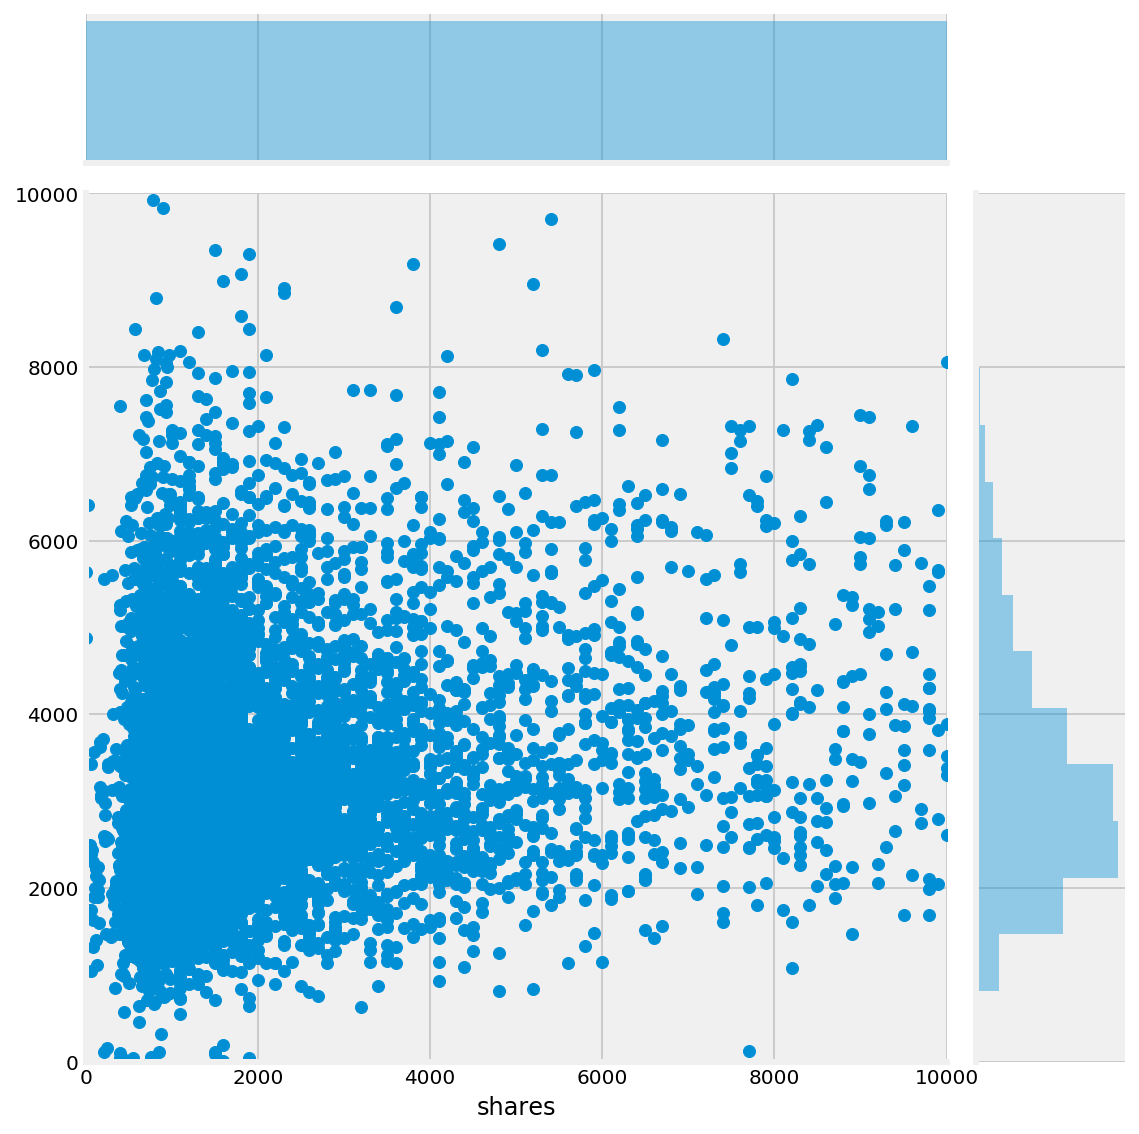

In [32]:
#Plot of Prediction vs Actual

prediction = linreg.predict(X_test[top_correlated_columns])

sns.jointplot(y_test, prediction, xlim=(0,10000), ylim=(0,10000), height=8);

<font color='blue'>

## 3) Build Linear Regression Model with 10 Variables

In [33]:
#Top 10 most correlated varirables to target

top_correlated = df.corr()['shares'].abs().sort_values()[::-1][1:11]
top_correlated

kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world         0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
Name: shares, dtype: float64

In [34]:
top_correlated_columns = list(top_correlated.keys())
top_correlated_columns

['kw_avg_avg',
 'LDA_03',
 'kw_max_avg',
 'LDA_02',
 'self_reference_avg_sharess',
 'self_reference_min_shares',
 'data_channel_is_world',
 'self_reference_max_shares',
 'num_hrefs',
 'kw_avg_max']

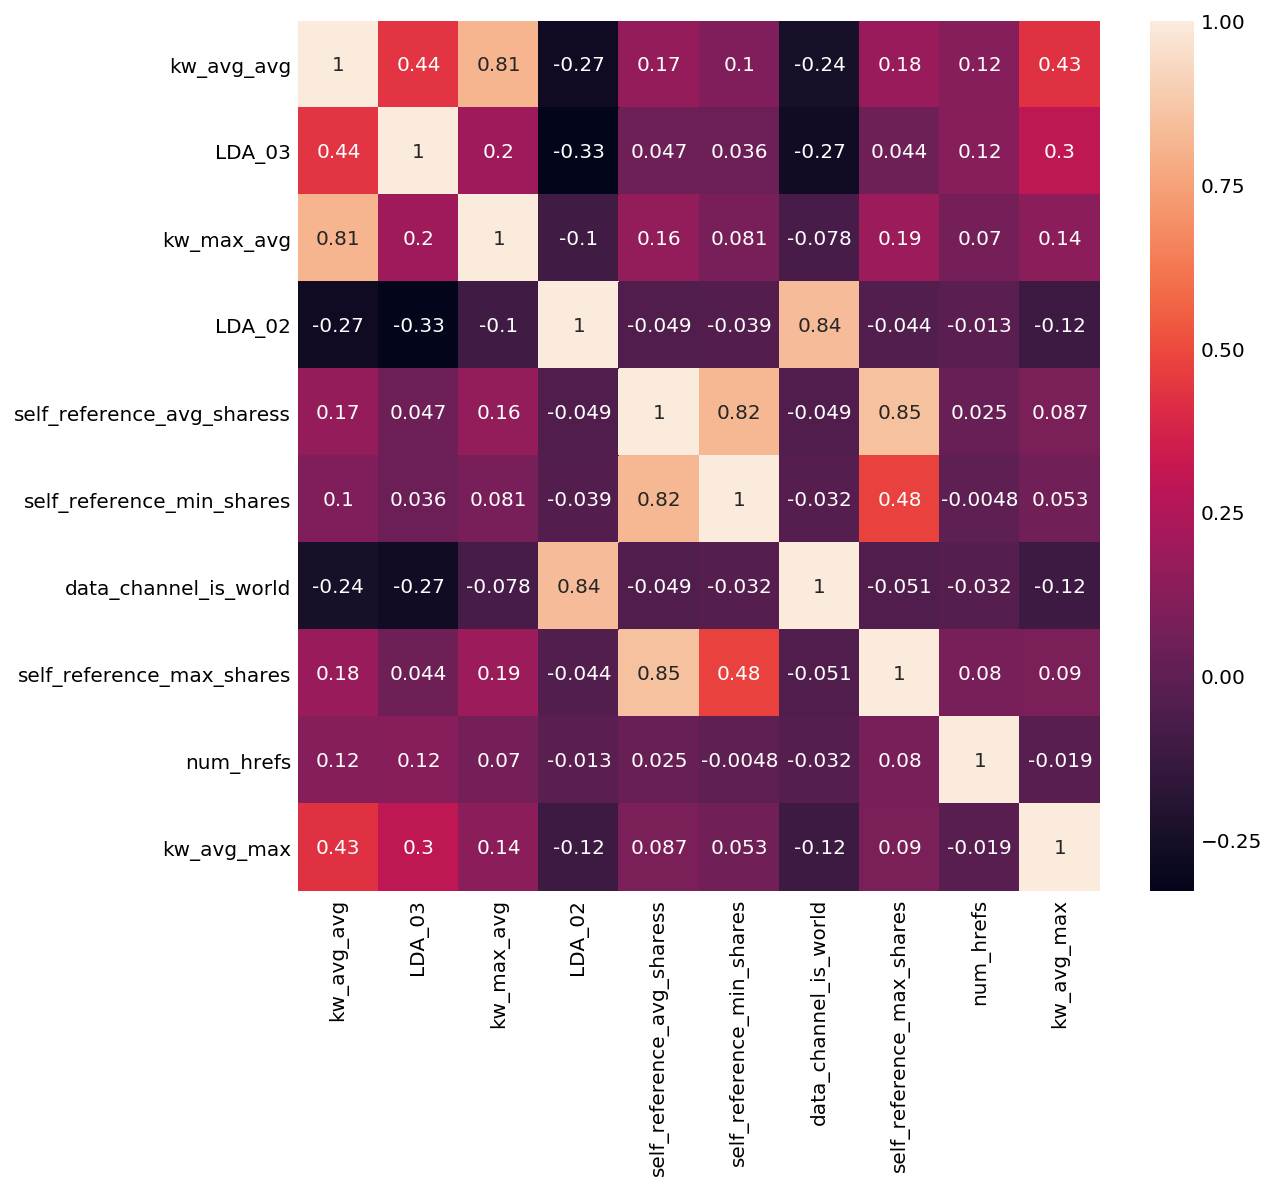

In [35]:
#Check for multicorrelation between top variables

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=df[top_correlated_columns].corr(), annot=True, ax=ax)

plt.show()

<font color='blue'>
    
### 3.3) Perform Cross Validation (cv=10) with Different Models for the top 10 correlated variables

<font color='blue'>
    
#### 3.3.1) Linear Regression

In [36]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train[top_correlated_columns], y_train, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[0.04039291 0.03283174 0.02458629 0.01754051 0.01823536 0.02288468
 0.01275363 0.02450094 0.00440817 0.03416055]
0.02322947786692341


In [37]:
linreg.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(linreg.score(X_test[top_correlated_columns], y_test)))

R2 Score: 0.011784499135022553


<font color='blue'>
    
#### 3.3.2) Ridge Regression

In [38]:
#Find optimal value for ridge regression alpha using RidgeCV

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, store_cv_values=False)
optimal_ridge.fit(X_train[top_correlated_columns], y_train)

print(optimal_ridge.alpha_, optimal_ridge.score(X_train[top_correlated_columns], y_train))

596.3623316594649 0.020582496677923112


In [39]:
#Cross-validate the ridge regression R2 with the optimal alpha

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train[top_correlated_columns], y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.04017289 0.03324964 0.02440828 0.01856413 0.01867722 0.02266198
 0.0126682  0.02512966 0.00447106 0.03416349]
0.02341665683607739


In [40]:
#Look at the Ridge Coefficients

ridge.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(ridge.score(X_test[top_correlated_columns], y_test)))
print("Ridge Coefficients:")
print(top_correlated_columns)
print(ridge.coef_)

R2 Score: 0.011602670739311094
Ridge Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess', 'self_reference_min_shares', 'data_channel_is_world', 'self_reference_max_shares', 'num_hrefs', 'kw_avg_max']
[1487.92763396  304.93285981 -490.37209072 -299.44409368  -68.94989463
  490.52819895  107.45466759  214.39994781  294.32649604 -150.26169153]


<font color='blue'>
    
#### 2.3.3) Lasso Regression

In [41]:
#Find optimal value for lasso regression alpha using LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train[top_correlated_columns], y_train)

print(optimal_lasso.alpha_, optimal_lasso.score(X_train[top_correlated_columns], y_train))

10.652095914534275 0.02059269187729662


In [42]:
#Cross-validate the Lasso regression R2 with the optimal alpha

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train[top_correlated_columns], y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.04047063 0.03333547 0.02461051 0.01904415 0.0182761  0.0225823
 0.01264795 0.02514302 0.00445589 0.03454859]
0.02351145952211785


In [43]:
#Look at the Lasso Coefficients

lasso.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(lasso.score(X_test[top_correlated_columns], y_test)))
print("Lasso Coefficients:")
print(top_correlated_columns)
print(lasso.coef_)

R2 Score: 0.011723250865566914
Lasso Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess', 'self_reference_min_shares', 'data_channel_is_world', 'self_reference_max_shares', 'num_hrefs', 'kw_avg_max']
[1570.5193236   284.8953565  -548.61755855 -253.80403249   -0.
  455.35311772   68.60387632  164.30784217  287.15432824 -162.39161031]


<font color='blue'>
    
#### 2.3.4) ElasticNet Regression

In [44]:
#Find optimal value for ElasticNet regression alpha using ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=30, cv=10)
optimal_enet.fit(X_train[top_correlated_columns], y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

11.237091567150113
1.0


In [45]:
#Cross-validate the ElasticNet regression R2 with the optimal alpha and l1_ratio.

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train[top_correlated_columns], y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.04045853 0.03335722 0.02459572 0.01906711 0.01828484 0.02256671
 0.01264038 0.02517127 0.00445313 0.03454403]
0.02351389432008022


In [46]:
#Look at the Enet Coefficients

enet.fit(X_train[top_correlated_columns], y_train)
print("R2 Score: {}" .format(enet.score(X_test[top_correlated_columns], y_test)))
print("ElasticNet Coefficients:")
print(top_correlated_columns)
print(enet.coef_)

R2 Score: 0.011711142848280898
ElasticNet Coefficients:
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess', 'self_reference_min_shares', 'data_channel_is_world', 'self_reference_max_shares', 'num_hrefs', 'kw_avg_max']
[1564.91583795  285.16485983 -543.52573429 -250.66859168   -0.
  455.07789672   64.7215976   163.77699336  286.86076238 -160.20954902]


<font color='blue'>
    
### 2.4) Conclusion

In [47]:
print('Linear Regression')
print('-'*30)
print('R2 Score: {}' .format(linreg.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, linreg.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, linreg.coef_))))
print('\n')

print('Ridge Regression')
print('-'*30)
print('R2 Score: {}' .format(ridge.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, ridge.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, ridge.coef_))))
print('\n')

print('Lasso Regression')
print('-'*30)
print('R2 Score: {}' .format(lasso.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, lasso.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, lasso.coef_))))
print('\n')

print('ElasticNet Regression')
print('-'*30)
print('R2 Score: {}' .format(enet.score(X_test[top_correlated_columns], y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, enet.predict(X_test[top_correlated_columns]))))
print('Coefficients: {}'.format(dict(zip(top_correlated_columns, enet.coef_))))

Linear Regression
------------------------------
R2 Score: 0.011784499135022553
Mean Squared Error: 178975875.3962066
Coefficients: {'kw_avg_avg': 1674.4794671946368, 'LDA_03': 280.1177385967644, 'kw_max_avg': -640.6117597669923, 'LDA_02': -310.44186137770265, 'self_reference_avg_sharess': -218.69295967660912, 'self_reference_min_shares': 575.746265297127, 'data_channel_is_world': 139.03098390148492, 'self_reference_max_shares': 305.7532621749529, 'num_hrefs': 287.1798578167411, 'kw_avg_max': -202.3977370660175}


Ridge Regression
------------------------------
R2 Score: 0.011602670739311094
Mean Squared Error: 179008806.3675037
Coefficients: {'kw_avg_avg': 1487.9276339603339, 'LDA_03': 304.93285980718616, 'kw_max_avg': -490.372090718458, 'LDA_02': -299.4440936780874, 'self_reference_avg_sharess': -68.94989463249175, 'self_reference_min_shares': 490.5281989493351, 'data_channel_is_world': 107.4546675878923, 'self_reference_max_shares': 214.39994780981277, 'num_hrefs': 294.3264960362065

In [48]:
#Using Statsmodel

model = sm.OLS(y_train, X_train[top_correlated_columns])
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     61.34
Date:                Sat, 29 Dec 2018   Prob (F-statistic):          4.12e-124
Time:                        13:57:04   Log-Likelihood:            -3.4156e+05
No. Observations:               31715   AIC:                         6.831e+05
Df Residuals:                   31705   BIC:                         6.832e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
kw_avg_avg                  1681.8467    151.299     11.116      0.000    1385.294    1978.399
LDA_03                       283.8851     77.132      3.680      0.000     132.703     435.067
kw_max_avg                  -657.3008    132.780     -4.950      0.000    -917.555    -397.047
LDA_02                      -301.7341    120.968     -2.494      0.013    -538.837     -64.631
self_reference_avg_sharess  -208.0958    270.394     -0.770      0.442    -738.078     321.886
self_reference_min_shares    580.7241    159.577      3.639      0.000     267.946     893.502
data_channel_is_world        117.9542    118.519      0.995      0.320    -114.348     350.256
self_reference_max_shares    301.7656    178.911      1.687      0.092     -48.907     652.438
num_hrefs                    277.2006     66.415      4.174      0.000     147.024     407.377
kw_avg_max                  -212.5921     78.768     -2.699      0.007    -366.981     -58.204
==============================================================================
Omnibus:                    87749.514   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5638058230.060
Skew:                          35.182   Prob(JB):                         0.00
Kurtosis:                    2067.362   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


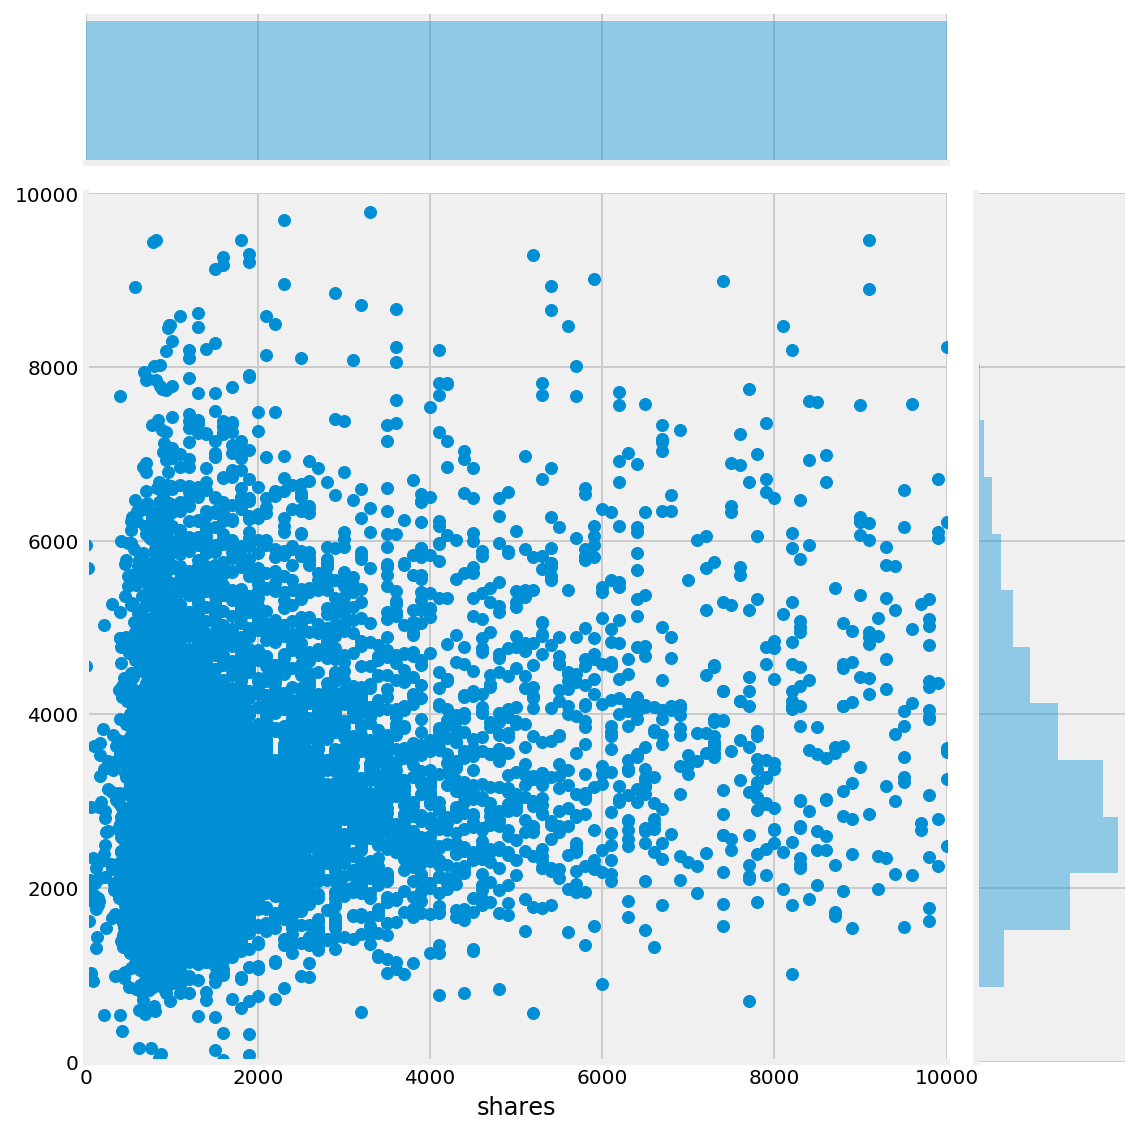

In [49]:
#Plot of Prediction vs Actual

prediction = linreg.predict(X_test[top_correlated_columns])

sns.jointplot(y_test, prediction, xlim=(0,10000), ylim=(0,10000), height=8);

<font color='blue'>

## 4) Build Linear Regression Model with ALL Variables

<font color='blue'>
    
### 4.1) Perform Cross Validation (cv=10) with Different Models for ALL variables

<font color='blue'>
    
#### 4.1.1) Linear Regression

In [50]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train, y_train, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[ 4.27311501e-02  3.29136476e-02 -2.76344146e+17  1.34161681e-02
  1.87650510e-02  2.66634168e-02  1.39922041e-02  2.64145381e-02
  5.64825792e-03  4.22200345e-02]
-2.76344145953959e+16


In [51]:
linreg.fit(X_train, y_train)
print("R2 Score: {}" .format(linreg.score(X_test, y_test)))

R2 Score: 0.014076129800531743


<font color='blue'>
    
#### 4.1.2) Ridge Regression

In [52]:
#Find optimal value for ridge regression alpha using RidgeCV

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, store_cv_values=False)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_, optimal_ridge.score(X_train, y_train))

2120.9508879201926 0.02440576346374534


In [53]:
#Cross-validate the ridge regression R2 with the optimal alpha

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.04070763 0.03269835 0.02416134 0.01792671 0.02046331 0.02513731
 0.01397179 0.02688931 0.00576719 0.03889997]
0.024662291736228692


In [54]:
#Look at the Ridge Coefficients

ridge.fit(X_train, y_train)
print("R2 Score: {}" .format(ridge.score(X_test, y_test)))

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

R2 Score: 0.013768498516707584


variable         coef     abs_coef
25                     kw_avg_avg  1179.186232  1179.186232
12  data_channel_is_entertainment  -416.248693   416.248693
26      self_reference_min_shares   399.933701   399.933701
24                     kw_max_avg  -383.060338   383.060338
42            global_subjectivity   350.541478   350.541478
5                       num_hrefs   299.789379   299.789379
39                         LDA_02  -266.621819   266.621819
9            average_token_length  -263.682197   263.682197
13            data_channel_is_bus  -193.150266   193.150266
40                         LDA_03   190.955935   190.955935

<font color='blue'>
    
#### 4.1.3) Lasso Regression

In [55]:
#Find optimal value for lasso regression alpha using LassoCV

optimal_lasso = LassoCV(n_alphas=30, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_, optimal_lasso.score(X_train, y_train))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

29.13714687991019 0.02452315537079741


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [56]:
#Cross-validate the Lasso regression R2 with the optimal alpha

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.04359277 0.03506661 0.02765033 0.01848944 0.02173789 0.02518748
 0.01402327 0.0294835  0.00588522 0.04023919]
0.02613556915793135


In [57]:
#Look at the Lasso Coefficients

lasso.fit(X_train, y_train)
print("R2 Score: {}" .format(lasso.score(X_test, y_test)))
print('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(len(lasso.coef_)))

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

R2 Score: 0.013965360690335715
Percent variables zeroed out: 0.3793103448275862


variable         coef     abs_coef
25                     kw_avg_avg  1688.018477  1688.018477
24                     kw_max_avg  -689.700997   689.700997
26      self_reference_min_shares   420.160773   420.160773
12  data_channel_is_entertainment  -311.916731   311.916731
5                       num_hrefs   291.882209   291.882209
42            global_subjectivity   287.994792   287.994792
23                     kw_min_avg  -253.971697   253.971697
9            average_token_length  -242.953175   242.953175
39                         LDA_02  -205.330884   205.330884
40                         LDA_03   182.978555   182.978555

<font color='blue'>
    
#### Try taking the remaining Lasso variables and run Ridge.

In [58]:
col_lasso = lasso_coefs[lasso_coefs['coef'] != 0]['variable'].values.tolist()

#Find optimal value for ridge regression alpha using RidgeCV

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, store_cv_values=False)
optimal_ridge.fit(X_train[col_lasso], y_train)

print(optimal_ridge.alpha_, optimal_ridge.score(X_train[col_lasso], y_train))

910.2981779915227 0.024721724863221772


In [59]:
#Cross-validate the ridge regression R2 with the optimal alpha

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train[col_lasso], y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.04210525 0.03449491 0.02576863 0.01826197 0.02167962 0.0261223
 0.01496501 0.02737567 0.00657038 0.04069207]
0.02580358105275693


In [60]:
#Look at the Ridge Coefficients

ridge.fit(X_train[col_lasso], y_train)
print("R2 Score: {}" .format(ridge.score(X_test[col_lasso], y_test)))

ridge_coefs = pd.DataFrame({'variable':col_lasso,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

R2 Score: 0.014133706610308107


variable         coef     abs_coef
0                      kw_avg_avg  1580.411345  1580.411345
1                      kw_max_avg  -681.734820   681.734820
2       self_reference_min_shares   423.297536   423.297536
3   data_channel_is_entertainment  -371.180149   371.180149
5             global_subjectivity   356.807833   356.807833
4                       num_hrefs   323.655287   323.655287
7            average_token_length  -285.497208   285.497208
8                          LDA_02  -270.568916   270.568916
6                      kw_min_avg  -237.202531   237.202531
11      self_reference_max_shares   195.723022   195.723022

<font color='blue'>
    
#### 4.1.4) ElasticNet Regression

In [61]:
#Find optimal value for ElasticNet regression alpha using ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=30, cv=10)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

29.13714687991019
1.0


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [62]:
#Cross-validate the ElasticNet regression R2 with the optimal alpha and l1_ratio.

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.04359277 0.03506661 0.02765033 0.01848944 0.02173789 0.02518748
 0.01402327 0.0294835  0.00588522 0.04023919]
0.02613556915793135


In [63]:
#Look at the Enet Coefficients

enet.fit(X_train, y_train)
print("R2 Score: {}" .format(enet.score(X_test, y_test)))

enet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

enet_coefs.head(10)

R2 Score: 0.013965360690335715


variable         coef     abs_coef
25                     kw_avg_avg  1688.018477  1688.018477
24                     kw_max_avg  -689.700997   689.700997
26      self_reference_min_shares   420.160773   420.160773
12  data_channel_is_entertainment  -311.916731   311.916731
5                       num_hrefs   291.882209   291.882209
42            global_subjectivity   287.994792   287.994792
23                     kw_min_avg  -253.971697   253.971697
9            average_token_length  -242.953175   242.953175
39                         LDA_02  -205.330884   205.330884
40                         LDA_03   182.978555   182.978555

<font color='blue'>
    
### 2.4) Conclusion

In [64]:
print('Linear Regression')
print('-'*30)
print('R2 Score: {}' .format(linreg.score(X_test, y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, linreg.predict(X_test))))
print('\n')

print('Ridge Regression')
print('-'*30)
print('R2 Score: {}' .format(ridge.score(X_test, y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, ridge.predict(X_test))))
print('\n')

print('Lasso Regression')
print('-'*30)
print('R2 Score: {}' .format(lasso.score(X_test, y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, lasso.predict(X_test))))
print('\n')

print('ElasticNet Regression')
print('-'*30)
print('R2 Score: {}' .format(enet.score(X_test, y_test)))
print('Mean Squared Error: {}' .format(mean_squared_error(y_test, enet.predict(X_test))))

Linear Regression
------------------------------
R2 Score: 0.014076129800531743
Mean Squared Error: 178560837.781349


Ridge Regression
------------------------------


ValueError: shapes (7929,58) and (36,) not aligned: 58 (dim 1) != 36 (dim 0)

In [ ]:
#Using Statsmodel

model = sm.OLS(y_train, X_train)
model = model.fit()
model.summary()

In [ ]:
#Plot of Prediction vs Actual

prediction = linreg.predict(X_test)

sns.jointplot(y_test, prediction, xlim=(0,10000), ylim=(0,10000), height=8);

<font color='blue'>

# Additional:

In [ ]:
"""
#Add a new column "is_popular" where articles with share rate > than 75% percentile is considered popular.

df['is_popular'] = np.where(target>=target.describe()['75%'], 1, 0)

"""

In [ ]:
"""
#count of popular/unpopular articles vs day published.

popular_days = df.groupby('is_popular')[df.columns[df.columns.str.contains('weekday')].tolist()].sum()

fig=plt.figure(figsize=(10,6))
ax = plt.gca()

popular_days.transpose().plot.bar(ax=ax)

plt.show()

"""

In [ ]:
#Scatter plot between deatures and target

top_correlated = df.corr()['shares'].abs().sort_values()[::-1][1:11]
top_correlated_columns = list(top_correlated.keys())


def plot_graph(data):
    for i in data:
        sns.jointplot(df[i], target, xlim=(0,10000), ylim=(0,10000), height=8)
    return plt.show()
        
plot_graph(top_correlated_columns)
